<a href="https://colab.research.google.com/github/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/UTE_TallerAnalisisCuanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Métodos Cuantitativos

### Maestría en Urbanismo (UTE, Ecuador).

Instructor: Daniel Oto-Peralías (https://otoperalias.github.io/)



_________________________

El objetivo del taller es aprender a explotar una encuesta a través de programas estadísticos de análisis cuantitativos.

Usaremos el [Censo de Población y Vivienda de Ecuador (2010)](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/) para analizar las características de las viviendas de la provincia de Loja.

**Vamos a necesitar el siguiente material:**
1. Los [datos del censo](https://www.ecuadorencifras.gob.ec/base-de-datos-censo-de-poblacion-y-vivienda/): hacemos clic en *A NIVEL DE SECTOR/– Censo Población y Vivienda 2010* y luego seleccionamos *Loja*.
2. El [cuestionario del censo](https://www.ecuadorencifras.gob.ec//wp-content/descargas/Poblacion_y_demo/Cuestionario_censal/cuestionario_censal.pdf), donde podemos ver el significado de los códigos numéricos que aparecen en los datos.
3. El diccionario de datos del censo, para saber el significado de cada variable. Se puede obtener a través de [este enlace](https://aplicaciones3.ecuadorencifras.gob.ec/BIINEC-war/index.xhtml?oe=CENSOS%20DE%20POBLACI%D3N%20Y%20VIVIENDA%20NACIONAL&a=2010&m=DECENAL&t=Datos%20Abiertos%20CSV), clicando en *Datos Abiertos CSV*, pero para evitaros tener que descargar dicho archivo tan pesado (~1GB), lo proporciono en [este enlace](https://github.com/otoperalias/teaching/raw/TallerUTE_AnalisisCuanti/material/Diccionario%20de%20Datos%20CPV2010.xls).
4. Además, es útil tener a mano esta publicación con una descripción de los resultados para la provincia de Loja. Disponible [aquí](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/), clicando en *Resultados provinciales/ Loja*.

### Sobre el programa informático

* En este taller usamos **Google Colab**, que es un *notebook* desde el que podemos ejecutar muchas librerías de **Python**.
* La librería principal que vamos a usar es **Pandas**, una "paquete" especialiado en el procesamiento y análisis de datos cuantitativos.
* La gran ventaja de Python-Pandas frente a otras alternativas (SPSS/Stata/etc.) es su carácter gratuito y la gran cantidad de recusos de ayuda que existe en Internet, debido a su enorme comunidad de usuarios.

## 1. Importamos las librerías que vamos a utilizar

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importamos los datos


Para ello, en primer lugar, tenemos que descargar los datos en nuestro ordenador y subirlos a Google Colab:
1. Clicamos en el icono de carpeta que hay en la parte superior de la barra de la izquierda (📁) y entonces clicamos en el primero icono de upload.
2. Se abre una ventana para seleccionar el archivo que queremos subir, y seleccionamos la carpeta comprimida "Loja_CSV_Vivienda".  

Una vez que lo tenemos subido y que aparece como tal ("Loja_CSV_Vivienda.zip") en la barra izquierda, podemos importarlo:

In [59]:
viv=pd.read_csv("Loja_CSV_Vivienda.zip",compression='zip')

Para visualizar la tabla, escribimos el nombre que le hemos dado

In [60]:
viv

,I01,I02,I03,I04,I05,I09,I10,URV,VTV,VAP,...,V11,V12A,V12B,V13,V14,V15,V16,TOTPER,TOTDOR,TOTEMI
0,11,1,50,1,1,1,1,1,1,3,...,1,05,00,1,3,1,1,4,1,
1,11,1,50,1,1,2,1,1,4,3,...,1,00,03,1,1,1,1,4,1,
2,11,1,50,1,1,3,1,1,6,3,...,,,,,,,,0,,
3,11,1,50,1,1,4,1,1,1,3,...,1,02,08,1,3,1,1,5,2,
4,11,1,50,1,1,5,1,1,4,3,...,,,,,,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155312,11,16,51,999,5,68,1,2,1,4,...,1,05,00,2,3,1,1,2,2,
155313,11,16,51,999,5,69,1,2,1,4,...,1,00,05,2,3,1,1,1,2,
155314,11,16,51,999,5,70,1,2,1,4,...,1,00,03,2,2,1,1,1,1,
155315,11,16,51,999,5,71,1,2,1,4,...,1,00,04,2,2,1,1,1,2,


In [27]:
# Columnas
viv.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I09', 'I10', 'URV', 'VTV', 'VAP',
       'VCO', 'V01', 'V03', 'V05', 'V02', 'V04', 'V06', 'V07', 'V08', 'V09',
       'V10', 'V11', 'V12A', 'V12B', 'V13', 'V14', 'V15', 'V16', 'TOTPER',
       'TOTDOR', 'TOTEMI'],
      dtype='object')

In [34]:
# Creamos un diccionario con el significado de cada columna:
cols= {
  "I01": "PROVINCIA",
  "I02": "CANTON",
  "I03": "PARROQUIA",
  "I04": "ZONA",
  "I05": "SECTOR",
  "I09": "No. DE VIVIENDA",
  "I10": "No. DE HOGAR",
  "URV": "Area urbana o rural",
  "VTV": "Tipo de vivienda",
  "VAP": "Via de acceso principal a la vivienda",
  "VCO": "Condición de ocupación de la vivienda",
  "V01": "Material predominante del techo o cubierta de la vivienda",
  "V03": "Material predominante de las paredes exteriores de la vivienda",
  "V05": "Material predominante del piso de la vivienda",
  "V02": "Estado del techo de la vivienda",
  "V04": "Estado de las paredes de la vivienda",
  "V06": "Estado del piso de la vivienda",
  "V07": "De donde proviene principalmente el agua que recibe la vivienda",
  "V08": "El agua que recibe la vivienda es",
  "V09": "El servicio higiénico o escusado de la vivienda es",
  "V10": "El servicio de luz (energía) eléctrica de la vivienda proviene principalmente",
  "V11": "Dispone la vivienda de medidor de energía eléctrica",
  "V12A": "Cuantos focos ahorradores tiene su vivienda",
  "V12B": "Cuantos focos convencionales tiene su vivienda",
  "V13": "Principalmente como elimina la basura",
  "V14": "Sin contar la cocina, el baño y cuartos de negocio.Cuantos cuartos tiene la vivienda",
  "V15": "Todas las personas que duermen en esta vivienda, cocinan sus alimentos en forma conjunta y comparten un mismo gasto para la comida",
  "V16": "Cuantos grupos de personas(hogares) duermen en su vivienda y cocinan los alimentos por separado incluya su hogar",
  "TOTPER": "Total de personas de la vivienda",
  "TOTDOR": "Total de dormitorios de la vivienda",
  "TOTEMI": "Total de emigrantes"
}

In [9]:
# Longitud de la base de datos= Total de viviendas:
print(len(viv))

155317


In [26]:
# Comprobamos en el PDF que en Loja hay 155308 viviendas. La diferencia se debe a que hay 9 cuestionarios de hogares sin viviendas.
# Tipo de Vivienda
viv.VTV.value_counts()

1     121940
2      12593
4       8056
3       7428
6       1680
5       1393
7       1351
8        605
9         75
10        59
14        54
13        25
16        24
11         9
17         9
15         9
12         7
Name: VTV, dtype: int64

<Axes: xlabel='VTV', ylabel='Percent'>

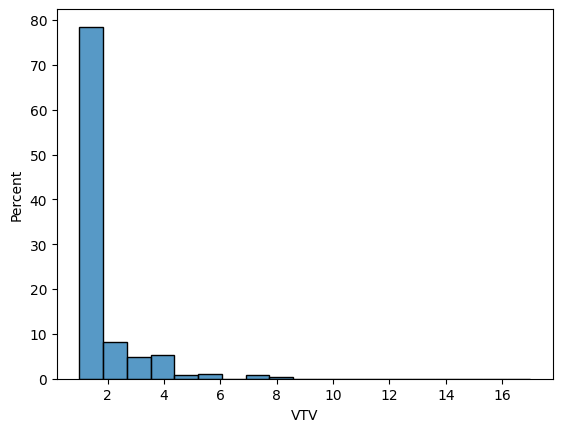

In [42]:
# Creamos gráfico similar al del PDF
sns.histplot(data=viv,x="VTV",stat="percent")

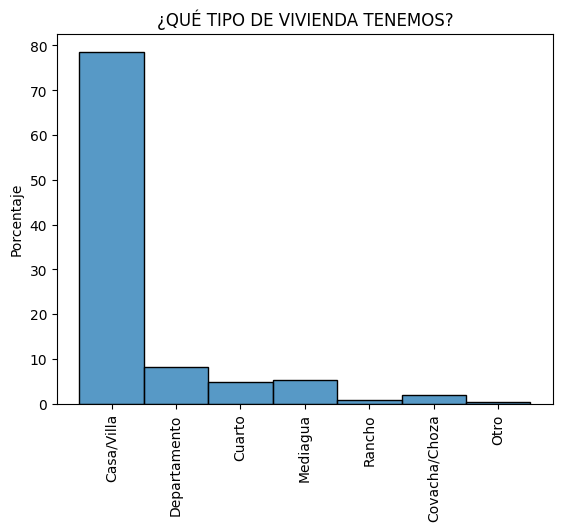

In [52]:
# Procesamos los datos para mejorar el gráfico
viv['tipov']=""
viv.loc[viv.VTV==1,'tipov']="Casa/Villa"
viv.loc[viv.VTV==2,'tipov']="Departamento"
viv.loc[viv.VTV==3,'tipov']="Cuarto"
viv.loc[viv.VTV==4,'tipov']="Mediagua"
viv.loc[viv.VTV==5,'tipov']="Rancho"
viv.loc[(viv.VTV==6) | (viv.VTV==7),'tipov']="Covacha/Choza"
viv.loc[(viv.VTV==8),'tipov']="Otro"

tabla=viv.loc[viv.VTV<=8].sort_values("VTV")
fig,ax=plt.subplots()
sns.histplot(data=tabla,x="tipov",stat="percent",ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Porcentaje")
ax.set_xlabel("")
ax.set_title("¿QUÉ TIPO DE VIVIENDA TENEMOS?")
plt.show()





<Axes: xlabel='V07', ylabel='Percent'>

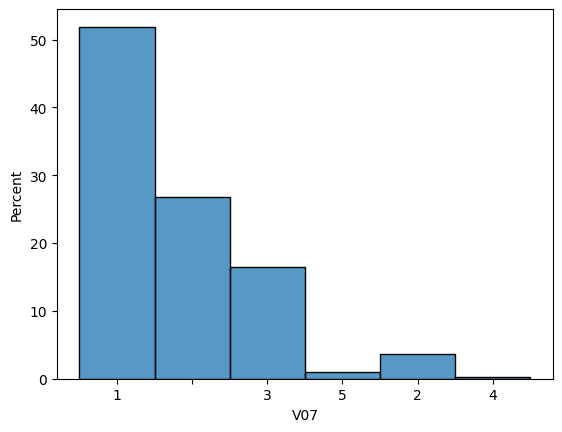

In [16]:
sns.histplot(data=viv, x="V07",stat="percent")